In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyscf.scf import hf

from os.path import join

import matplotlib as mpl
mpl.style.use(["seaborn", "thesis"])
ticker = mpl.ticker

from SCFInitialGuess.utilities.analysis import density_cut, matrix_error

export_folder = "/home/jo/Repos/MastersThesis/AtomicBlocks/figures/"

/home/jo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Fetch Dataset 

In [2]:
folder = "../../../dataset/EthenT/"
data_path = folder
subfolder = "EmbeddedDensities/"
postfix = "EthenT"
basis = "6-311++g**"
dim = 72
molecules = np.load(folder + "molecules" + postfix + ".npy")
ind_test = int(0.8 * len(molecules))
S = np.load(join(data_path, "S" + postfix + ".npy"))
P = np.load(join(data_path, "P" + postfix + ".npy")).reshape(-1, dim, dim)
#molecules = molecules[ind_test:]

# Get Energies 

In [3]:
from SCFInitialGuess.utilities.analysis import measure_hf_energy

energies = measure_hf_energy(P, molecules)

# Fetch guesses 

In [5]:
p_gwh = np.load(folder + subfolder + "p_gwh.npy")
p_embedded_gwh = np.load(folder + subfolder + "p_embedded_gwh.npy")
p_embedded_outer_gwh = np.load(folder + subfolder + "p_embedded_outer_gwh.npy")

# Calculate Guess Energies

In [6]:
E_gwh = measure_hf_energy(p_gwh, molecules)
E_embedded_gwh = measure_hf_energy(p_embedded_gwh, molecules)
E_embedded_outer_gwh = measure_hf_energy(p_embedded_outer_gwh, molecules)

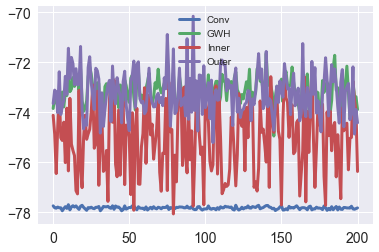

In [7]:
plt.plot(energies[ind_test:], label="Conv")
plt.plot(E_gwh, label="GWH")
plt.plot(E_embedded_gwh, label="Inner")
plt.plot(E_embedded_outer_gwh, label="Outer")
plt.legend()

# Pplot Energy Scatter 

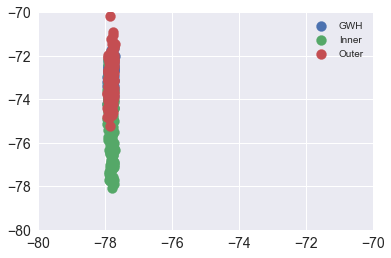

In [8]:
lower = -80
upper = -70

plt.scatter(energies[ind_test:], E_gwh, label="GWH")
plt.scatter(energies[ind_test:], E_embedded_gwh, label="Inner")
plt.scatter(energies[ind_test:], E_embedded_outer_gwh, label="Outer")
plt.legend()

plt.xlim([lower, upper])
plt.ylim([lower, upper])
plt.show()

# Energy vs Error 

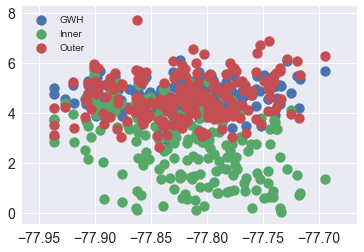

In [9]:
E = energies[ind_test:]

plt.scatter(E, np.abs(np.array(E)-np.array(E_gwh)), label="GWH")
plt.scatter(E, np.abs(np.array(E)-np.array(E_embedded_gwh)), label="Inner")
plt.scatter(E, np.abs(np.array(E)-np.array(E_embedded_outer_gwh)), label="Outer")
plt.legend()

plt.show()

# Density Error vs Energy 

In [14]:
from SCFInitialGuess.utilities.analysis import density

dm = [
    density(mol.get_pyscf_molecule(), p)[0] for (mol, p) in zip(molecules, P[ind_test:])
]

In [ ]:
dm_gwh = [density(mol.get_pyscf_molecule(), p)[0] for (mol, p) in zip(molecules[ind_test:], p_gwh)]
dm_embedded_gwh = [density(mol.get_pyscf_molecule(), p)[0] for (mol, p) in zip(molecules[ind_test:], p_embedded_gwh)]
dm_embedded_outer_gwh = [density(mol.get_pyscf_molecule(), p)[0] for (mol, p) in zip(molecules[ind_test:], p_embedded_outer_gwh)]

In [19]:
def difference(dm, dm_guess):
    return [
        np.mean(np.abs(lhs - rhs)) \
            for lhs, rhs in zip(dm, dm_guess)
    ]

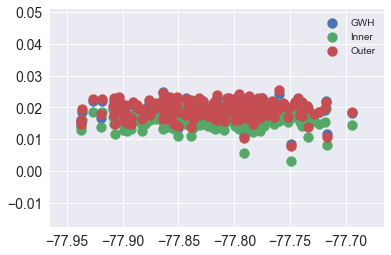

In [20]:
plt.scatter(E, difference(dm, dm_gwh), label="GWH")
plt.scatter(E, difference(dm, dm_embedded_gwh), label="Inner")
plt.scatter(E, difference(dm, dm_embedded_outer_gwh), label="Outer")
plt.legend()

plt.show()

In [ ]:
del e